# What can we do with different kinds of data?



In [105]:
import pandas as pd
from random import randrange 

# Interval data, e.g. age in years

Question: What is your age?

In [13]:

age=[22,22,21,20,21,21,20,22,21,21,21,36]
NumberofStudents=len(age)
print(NumberofStudents)

age=[randrange(20, 35) for _ in range(NumberofStudents)]
df=pd.DataFrame(age,columns=["age"])
df.describe()
df

12


,age
0,23
1,26
2,24
3,33
4,33
5,22
6,30
7,30
8,22
9,23


We can count values:

<AxesSubplot: >

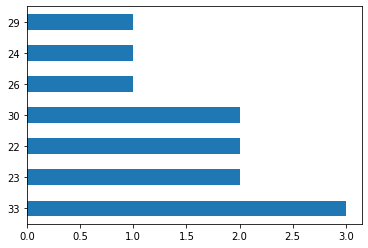

In [14]:
df.age.value_counts().plot.barh()

We can make a histogram.

<AxesSubplot: ylabel='Frequency'>

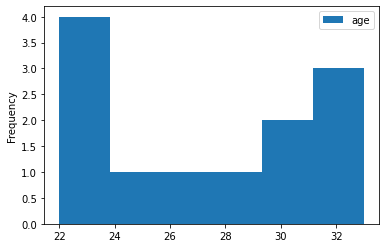

In [20]:
df.plot.hist(bins=6)

[Text(0.5, 1.0, 'Mean with SD')]

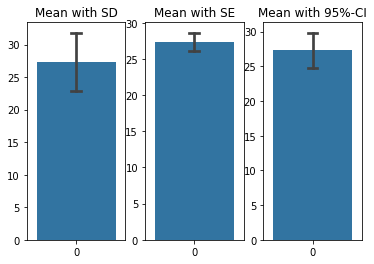

In [63]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3)
sns.barplot(ax=axs[2], data=age, estimator=np.mean, errorbar=('ci', 95), capsize=.1).set(title='Mean with 95%-CI')
sns.barplot(ax=axs[1], data=age, estimator=np.mean, errorbar=('se'), capsize=.1).set(title='Mean with SE')
sns.barplot(ax=axs[0], data=age, estimator=np.mean, errorbar=('sd'), capsize=.1).set(title='Mean with SD')

# Ordinal data

Question: How spicy do you like your Burito? 
(not spicy, little spicy, medium spicy, very spicy, insane) (1-5)

Why is this ordinal data? --> because there is a defined order but no defined distance between the answers.

Question2: How worried are you about the assignment? (1-5)

This is also ordinal data. But we can define that the distance is to be considered equal to treat it as interval data.

In [87]:
burito=[randrange(1,6) for i in range(NumberofStudents)]
#burito=[1,3,2,1,2,2,3,2,2,3,3,4]


df=pd.DataFrame({"age":age,"burito":burito})

exam=[5,5,5,5,5,5,5,5,5,4,5,1]

exam=[randrange(1,6) for i in range(NumberofStudents)]
#exam=[]


df=pd.DataFrame({"age":age,"burito":burito,"exam":exam})

print("Does it make sense to calculate the mean value of ordinal data? \n \n --> No! <-- \n\n")

print(df.describe())
df

Does it make sense to calculate the mean value of ordinal data? 
 
 --> No! <-- 


             age     burito       exam
count  12.000000  12.000000  12.000000
mean   27.333333   2.833333   3.083333
std     4.478907   1.114641   1.505042
min    22.000000   1.000000   1.000000
25%    23.000000   2.000000   2.000000
50%    27.500000   3.000000   3.000000
75%    30.750000   4.000000   4.250000
max    33.000000   4.000000   5.000000


,age,burito,exam
0,23,4,1
1,26,4,4
2,24,4,3
3,33,3,5
4,33,2,5
5,22,4,5
6,30,3,3
7,30,1,2
8,22,1,2
9,23,2,1


<AxesSubplot: title={'center': 'how spicy do you like your burito?'}>

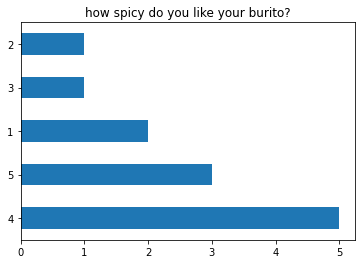

In [86]:
df.burito.value_counts().plot.barh(title="how spicy do you like your burito?")

<AxesSubplot: ylabel='Frequency'>

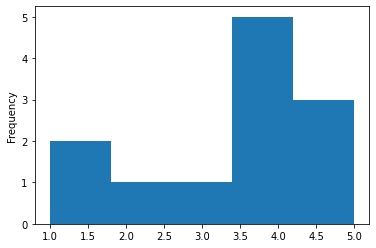

In [68]:
df.burito.plot.hist(bins=5)

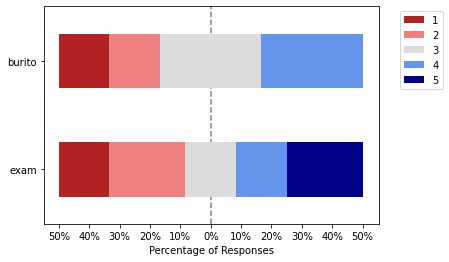

In [88]:
import plot_likert
likert=df[["burito","exam"]]
plot_likert.plot_likert(likert.astype(str), plot_likert.scales.raw5, plot_percentage=True);

# Nominal Data, e.g. nationality or gender

In [89]:
nation="Be,De,De,Aus,De,At,In,De,De,Sg,De,De"

nation=[i.upper() for i in nation.split(",")]
print(len(nation))
df=pd.DataFrame({"age":age,"nation":nation,"burito":burito,"exam":exam})
#print("gender: ", df.gender.describe())

#df=pd.DataFrame({"nation":nation})

12


             age     burito       exam
count  12.000000  12.000000  12.000000
mean   27.333333   2.833333   3.083333
std     4.478907   1.114641   1.505042
min    22.000000   1.000000   1.000000
25%    23.000000   2.000000   2.000000
50%    27.500000   3.000000   3.000000
75%    30.750000   4.000000   4.250000
max    33.000000   4.000000   5.000000


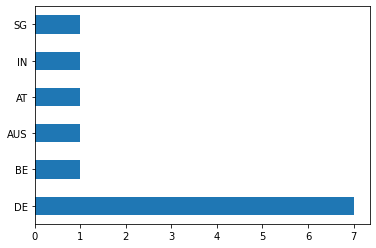

In [90]:
df.nation.value_counts().plot.barh()
print(df.describe())

# Let's have a look at crosstabulation!

In [91]:

contingency=pd.crosstab(df.nation, df.exam)

#pd.crosstab(df.gender, df.burito, normalize='index')
contingency

exam,1,2,3,4,5
nation,,,,,
AT,0,0,0,0,1
AUS,0,0,0,0,1
BE,1,0,0,0,0
DE,0,3,1,2,1
IN,0,0,1,0,0
SG,1,0,0,0,0


<AxesSubplot: xlabel='exam', ylabel='nation'>

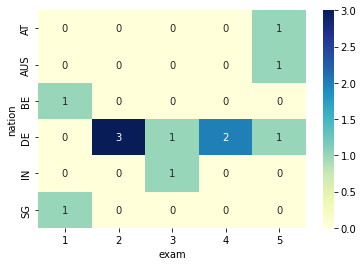

In [92]:
## Illustrate the crostab in a Heatmap:
import seaborn as sns
sns.heatmap(contingency, annot=True, cmap="YlGnBu")


# Testing a 0-Hypothesis: Are burito & nationality independent?

In [97]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingency)

print("p-value: ", p)

print("\n\n if the p-value is below 0.1 or below 0.05, we reject the 0-Hypothesis. \n\n The confidence level is your choice (but you can follow standards)!")

p-value:  0.2423921616705121


 if the p-value is below 0.1 or below 0.05, we reject the 0-Hypothesis. 

 The confidence level is your choice (but you can follow standards)!


# Some questions to be answered with "no" for nominal data

- Would it make sense to calculate a mean value?
- Would it make sense to draw a histogram?

Would it make sense to *correlate* gender with the other variables?

"NO! --> but we can try burito vs. exam, assuming that both are interval data"


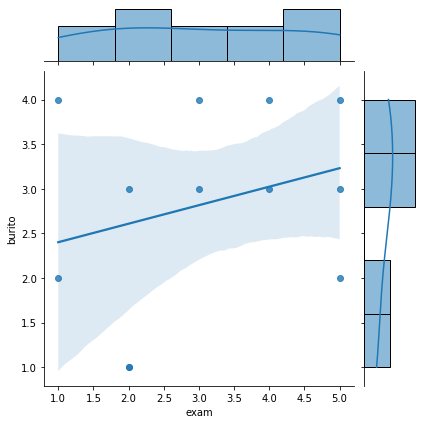

In [98]:
import seaborn as sns
#df.plot.scatter(x="gender", y="burito_spicy")

#sns.jointplot(df,x="gender", y="burito", kind="reg")

sns.jointplot(df,x="exam", y="burito", kind="reg")


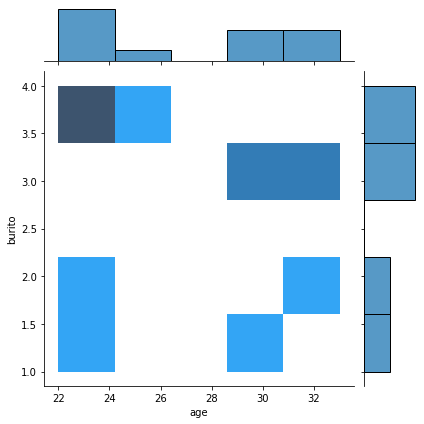

In [99]:
# or, again - a histogram

sns.jointplot(df,x="age", y="burito", kind="hist")

[Text(0.5, 1.0, 'Mean with SD')]

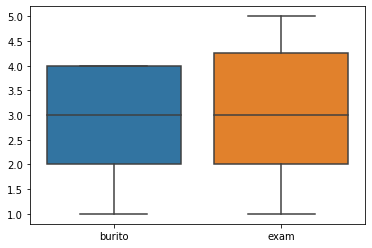

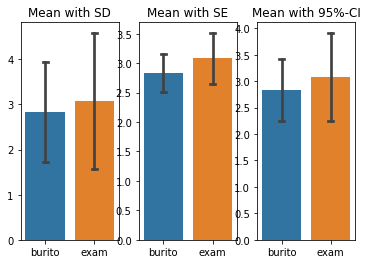

In [103]:
#We can compare mean values in a box plot:

sns.boxplot(data=df[["burito","exam"]])
df.burito.describe()


fig, axs = plt.subplots(1,3)
sns.barplot(ax=axs[2], data=df[["burito","exam"]], estimator=np.mean, errorbar=('ci', 95), capsize=.1).set(title='Mean with 95%-CI')
sns.barplot(ax=axs[1], data=df[["burito","exam"]], estimator=np.mean, errorbar=('se'), capsize=.1).set(title='Mean with SE')
sns.barplot(ax=axs[0], data=df[["burito","exam"]], estimator=np.mean, errorbar=('sd'), capsize=.1).set(title='Mean with SD')

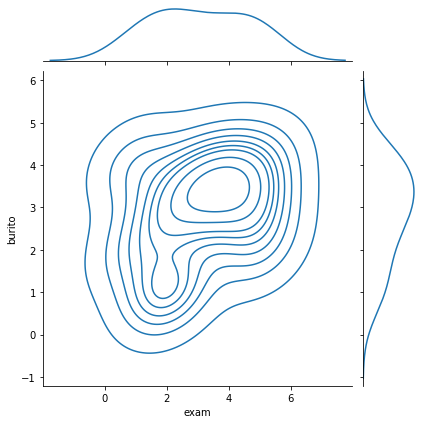

In [104]:
# if you assume normal distribution, you can analyze KDE - plots

sns.jointplot(df,x="exam", y="burito", kind="kde")